# MARATONA BEHIND THE CODE 2020

## DESAFIO 2: PARTE 1

## Testes com modelo TPOT
- Autor: Rodrigo Lima
- LinkedIN: https://www.linkedin.com/in/rodrigolima82/

# Parte 01. Importando as bibliotecas

In [26]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive
from tpot import TPOTClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.metrics import roc_auc_score, recall_score

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

Using TensorFlow backend.


# Parte 02. Carregando o Dataset

In [22]:
# Carregando o dataset da competição
dados = pd.read_csv('../data/dataset_desafio_2.csv')

# Visualizando os primeiros registros
dados.head()

,MATRICULA,NOME,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL
0,502375,Márcia Illiglener,0,0,0,0,6.2,5.8,4.6,5.9,0.0,2,4,3,EXATAS
1,397093,Jason Jytereoman Izoimum,0,0,0,0,6.0,6.2,5.2,4.5,1.0,2,4,3,EXATAS
2,915288,Bartolomeu Inácio da Gama,0,0,0,0,7.3,6.7,7.1,7.2,0.0,5,0,3,HUMANAS
3,192652,Fernanda Guedes,1,3,1,1,0.0,0.0,0.0,0.0,1.0,4,4,4,DIFICULDADE
4,949491,Alessandre Borba Gomes,1,3,1,1,0.0,0.0,0.0,0.0,1.0,5,2,5,DIFICULDADE


# Parte 04. Feature Engineering
> Nesta fase estarei trabalhando na manipulação dos dados
> Importante realizar o mínimo de alterações para não descaracterizar as informações
> Vou remover algumas colunas que identifiquei na análise exploratória e criar outras colunas que julgo interessante

In [23]:
# Remove as variáveis de ID
dados.drop(['MATRICULA', 'NOME'], axis = 1, inplace = True)

In [24]:
# Visualizando o dataset final
print(dados.shape)
dados.head()

(20000, 13)


,REPROVACOES_DE,REPROVACOES_EM,REPROVACOES_MF,REPROVACOES_GO,NOTA_DE,NOTA_EM,NOTA_MF,NOTA_GO,INGLES,H_AULA_PRES,TAREFAS_ONLINE,FALTAS,PERFIL
0,0,0,0,0,6.2,5.8,4.6,5.9,0.0,2,4,3,EXATAS
1,0,0,0,0,6.0,6.2,5.2,4.5,1.0,2,4,3,EXATAS
2,0,0,0,0,7.3,6.7,7.1,7.2,0.0,5,0,3,HUMANAS
3,1,3,1,1,0.0,0.0,0.0,0.0,1.0,4,4,4,DIFICULDADE
4,1,3,1,1,0.0,0.0,0.0,0.0,1.0,5,2,5,DIFICULDADE


In [33]:
#dados.dropna(inplace=True)
dados.fillna(0, inplace=True)

# Categorizar a coluna target
dados['PERFIL'] = dados['PERFIL'].astype("category").cat.codes

# Separar target
X = dados.drop(['PERFIL'], axis=1)
y = dados['PERFIL']


# Realizando o balanceamento dos dados para cada classe usando SMOTE
sm = SMOTE(random_state=0)
X, y = sm.fit_sample(X, y)

X = StandardScaler().fit(X).transform(X.astype(float))

# Parte 05. Executando o TPOT

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [41]:
pipeline_optimizer = TPOTClassifier(generations=15, population_size=20, cv=5, 
                                    random_state=42, verbosity=3, scoring='f1_micro')

In [9]:
pipeline_optimizer.fit(X_train, y_train)

Imputing missing values in feature set



Generation 1 - Current best internal CV score: 0.8119999999999999
Generation 2 - Current best internal CV score: 0.8119999999999999
Generation 3 - Current best internal CV score: 0.8119999999999999
Generation 4 - Current best internal CV score: 0.8119999999999999
Generation 5 - Current best internal CV score: 0.8130625
Generation 6 - Current best internal CV score: 0.8130625
Generation 7 - Current best internal CV score: 0.8130625
Generation 8 - Current best internal CV score: 0.8143125
Generation 9 - Current best internal CV score: 0.8143125
Generation 10 - Current best internal CV score: 0.8143125
Generation 11 - Current best internal CV score: 0.8143125
Generation 12 - Current best internal CV score: 0.8143125
Generation 13 - Current best internal CV score: 0.8143125
Generation 14 - Current best internal CV score: 0.8143125
Generation 15 - Current best internal CV score: 0.8149374999999999
Best pipeline: XGBClassifier(RobustScaler(input_matrix), learning_rate=0.01, max_depth=8, min

ValueError: could not convert string to float: 'EXCELENTE'

In [11]:
# get the best pipeline TPOT found
best_pipeline = pipeline_optimizer.fitted_pipeline_

# score the pipeline (will retrain but keep the model / hyperparameters)
score = np.mean(cross_val_score(estimator=best_pipeline, X=X, y=y, cv=5))
print(score)


0.81555


Acurácia : 81.55
Sensibilidade : 0.9185049019607843
Especificidade : 0.7776141384388807


              precision    recall  f1-score   support

 DIFICULDADE       0.89      0.75      0.82      1400
      EXATAS       0.81      0.91      0.86      1646
   EXCELENTE       0.64      0.66      0.65       134
     HUMANAS       0.76      0.96      0.85       639
   MUITO_BOM       0.30      0.04      0.07       181

    accuracy                           0.82      4000
   macro avg       0.68      0.66      0.65      4000
weighted avg       0.80      0.82      0.80      4000



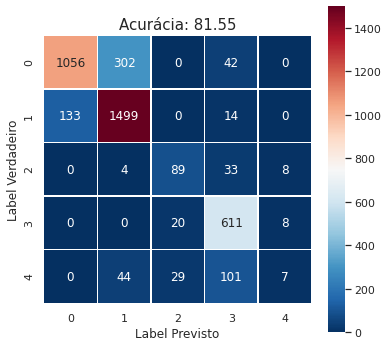

In [20]:
# Previsões para cada classe com dados de teste
y_pred = best_pipeline.predict(X_test)

# Calcula o score com dados de teste
score_v1 = accuracy_score(y_test, y_pred) * 100

# Print
print("Acurácia :", score_v1)

# Cria a matriz de confusão
conf_matriz = confusion_matrix(y_test, y_pred)

# Calcula especificidade e sensibilidade
speci = conf_matriz[0,0] / (conf_matriz[0,0] + conf_matriz[0,1])
sensi = conf_matriz[1,1] / (conf_matriz[1,0] + conf_matriz[1,1])

# Print
print('Sensibilidade :', sensi)
print('Especificidade :', speci)
print('\n')

# Matriz de Confusão gráfica
sns.set(rc={'figure.figsize':(6, 6)})
sns.heatmap(conf_matriz, 
            annot = True, 
            fmt = ".0f", 
            linewidths = .5, 
            square = True, 
            cmap = 'RdBu_r')

# Labels e Títulos
plt.ylabel('Label Verdadeiro')
plt.xlabel('Label Previsto')
plt.title('Acurácia: {:.2f}'.format(score_v1), size = 15)

# Relatório de Classificação
print(classification_report(y_test, y_pred))

# TESTE CRIANDO DUAS COLUNAS: SOMA DAS NOTAS E MEDIA DAS NOTAS

In [51]:
# Carregando os dados
dados = pd.read_csv('../data/dataset_desafio_2.csv')

# Removendo colunas unicas
dados.drop(['MATRICULA', 'NOME'], axis = 1, inplace = True)

# Preencher missing com zero
dados.fillna(0, inplace=True)

# Categorizar a coluna target
dados['PERFIL'] = dados['PERFIL'].astype("category").cat.codes

# Criar duas colunas: soma e media das notas
cols_notas = ['NOTA_DE','NOTA_EM','NOTA_MF','NOTA_GO']
dados['SOMA_NOTAS']  = dados[cols_notas].sum(axis=1)
dados['MEDIA_NOTAS'] = dados[cols_notas].mean(axis=1)

# Separar target
X = dados.drop(['PERFIL'], axis=1)
y = dados['PERFIL']

# Realizando o balanceamento dos dados para cada classe usando SMOTE
sm = SMOTE(random_state=0)
X, y = sm.fit_sample(X, y)

# Padronizar os dados
X = StandardScaler().fit(X).transform(X.astype(float))

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Instanciar o modelo
tpot_model = TPOTClassifier(generations=15, population_size=20, cv=5, random_state=42, verbosity=3, scoring='f1_micro')

In [52]:
# Executar o treinamento
tpot_model.fit(X_train, y_train)

32 operators have been imported by TPOT.



Generation 1 - Current Pareto front scores:
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.GBClassifier__nthread=1, XGBClassifier__subsample=0.9500000000000001)

Generation 2 - Current Pareto front scores:
_pre_test decorator: _random_mutation_operator: num_test=0 Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False.GBClassifier__nthread=1, XGBClassifier__subsample=0.9500000000000001)
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).
_pre_test decorator: _random_mutation_operator: num_test=1 Negative values in data passed to MultinomialNB (input X).

Generation 3 - Current Pareto front scores:
_pre_test decorator: _random_mutation_operator: num_test=0 Solver lbfgs sup

Skipped pipeline #291 due to time out. Continuing to the next pipeline.
Skipped pipeline #300 due to time out. Continuing to the next pipeline.
Skipped pipeline #302 due to time out. Continuing to the next pipeline.

Generation 14 - Current Pareto front scores:
-1	0.8695625759416767	XGBClassifier(input_matrix, XGBClassifier__learning_rate=0.5, XGBClassifier__max_depth=10, XGBClassifier__min_child_weight=2, XGBClassifier__n_estimators=100, XGBClassifier__nthread=1, XGBClassifier__subsample=0.9500000000000001)
_pre_test decorator: _random_mutation_operator: num_test=0 Negative values in data passed to MultinomialNB (input X).sifier__learning_rate=0.5, XGBClassifier__max_depth=10, XGBClassifier__min_child_weight=2, XGBClassifier__n_estimators=100, XGBClassifier__nthread=1, XGBClassifier__subsample=0.9500000000000001)
Skipped pipeline #318 due to time out. Continuing to the next pipeline.
Skipped pipeline #330 due to time out. Continuing to the next pipeline.

Generation 15 - Current Paret

TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=15,
               log_file=<ipykernel.iostream.OutStream object at 0x7ff57cf9ce50>,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=42, scoring='f1_micro', subsample=1.0,
               template=None, use_dask=False, verbosity=3, warm_start=False)

In [53]:
# Pegando o melhor modelo
best_model = tpot_model.fitted_pipeline_

# Calculando o score
score = np.mean(cross_val_score(estimator=best_model, X=X, y=y, cv=5))
print(score)

0.8783232077764277


In [55]:
tpot_model.

array([0, 1, 2, 3, 4], dtype=int8)